In [1]:
#all imports
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

odf = pd.read_csv('prediction_occupancy_2026.csv')

rdf = pd.read_csv('prediction_revenue_2026.csv')


,year,month,LOT 2 General,LOT 2 Premium,LOT 3,LOT 4 General,LOT 4 Premium,LOT 5,LOT 6,revenue
0,2026,April,708884.170699,280507.094091,545053.909812,968602.398810,342883.032009,326914.888990,507049.854351,3.679895e+06
1,2026,August,840960.152727,314527.349104,529280.548638,769368.919470,355750.312955,706873.943968,438444.008918,3.955205e+06
2,2026,December,676471.502735,311355.104237,577123.047962,779886.706526,332912.704785,709556.073072,341566.979351,3.728872e+06
3,2026,February,593831.985714,260844.050859,503317.797078,886721.955844,318800.921111,159897.580404,468767.913478,3.192182e+06
4,2026,January,571985.546150,288987.543712,456833.359331,847848.445426,343693.516872,225840.339363,461098.228759,3.196287e+06


In [3]:
odf.head()

,date,day,LOT 2 General % Capacity,LOT 2 General Occupied,LOT 2 General Spaces,LOT 2 Premium % Capacity,LOT 2 Premium Occupied,LOT 2 Premium Spaces,LOT 3 % Capacity,LOT 3 Occupied,...,LOT 4 Premium Spaces,LOT 5 % Capacity,LOT 5 Occupied,LOT 5 Spaces,LOT 6 % Capacity,LOT 6 Occupied,LOT 6 Spaces,Total Facility % Capacity,Total Facility Occupied,Total Facility Spaces
0,2026-01-01,Thursday,0.527258,642.792556,1214.0,0.809905,279.417319,345.0,0.491138,584.620726,...,350.0,0.129152,343.354141,2296.0,0.562081,751.141341,1337.0,0.629645,3656.411897,8122.9
1,2026-01-02,Friday,0.509745,621.379600,1214.0,0.764629,263.797006,345.0,0.539308,642.855187,...,350.0,0.132229,354.161148,2296.0,0.588328,782.387639,1337.0,0.638808,3452.937895,8122.9
2,2026-01-03,Saturday,0.502386,612.409107,1214.0,0.756190,260.885471,345.0,0.526308,627.358690,...,350.0,0.133018,361.262036,2296.0,0.606297,808.445131,1337.0,0.625762,3354.357690,8122.9
3,2026-01-04,Sunday,0.493098,601.086577,1214.0,0.711331,245.409052,345.0,0.514650,613.462319,...,350.0,0.188634,476.893929,2296.0,0.543942,731.600061,1337.0,0.602506,3236.571854,8122.9
4,2026-01-05,Monday,0.505697,616.445107,1214.0,0.751551,259.285119,345.0,0.457503,545.177587,...,350.0,0.143745,365.351832,2296.0,0.531519,700.942444,1337.0,0.569749,3359.661069,8122.9


In [5]:
rdf.head()

,year,month,LOT 2 General,LOT 2 Premium,LOT 3,LOT 4 General,LOT 4 Premium,LOT 5,LOT 6,revenue
0,2026,April,708884.170699,280507.094091,545053.909812,968602.398810,342883.032009,326914.888990,507049.854351,3.679895e+06
1,2026,August,840960.152727,314527.349104,529280.548638,769368.919470,355750.312955,706873.943968,438444.008918,3.955205e+06
2,2026,December,676471.502735,311355.104237,577123.047962,779886.706526,332912.704785,709556.073072,341566.979351,3.728872e+06
3,2026,February,593831.985714,260844.050859,503317.797078,886721.955844,318800.921111,159897.580404,468767.913478,3.192182e+06
4,2026,January,571985.546150,288987.543712,456833.359331,847848.445426,343693.516872,225840.339363,461098.228759,3.196287e+06


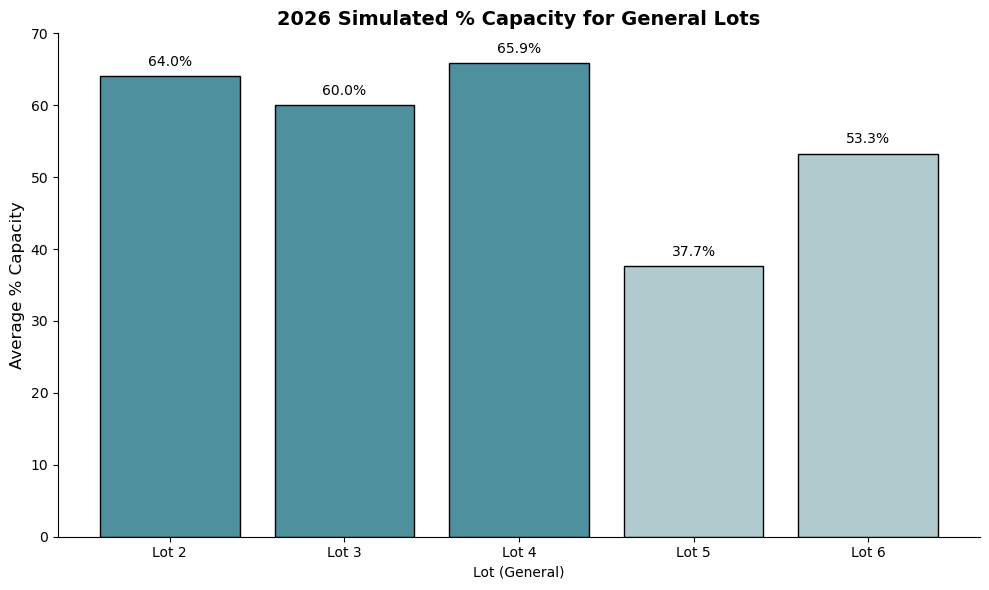

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Prepare data ---
# Filter only the "General" % Capacity columns
general_cols = ['LOT 2 General % Capacity', 'LOT 3 % Capacity', 'LOT 4 General % Capacity', 'LOT 5 % Capacity', 'LOT 6 % Capacity']

# Compute average % Capacity per lot
avg_general = odf[general_cols].mean().reset_index()
avg_general.columns = ['Lot', 'Average % Capacity']

# --- Simplify x-axis labels ---
avg_general['Lot Label'] = ['Lot 2', 'Lot 3', 'Lot 4', 'Lot 5', 'Lot 6']

# --- Define colors ---
def lot_color(lot_name):
    lot_lower = lot_name.lower()
    if any(num in lot_lower for num in ["2", "3", "4"]):
        return "#4e909e"  # blue shades
    elif any(num in lot_lower for num in ["5", "6"]):
        return "#b0cbce"
    else:
        return "#8ecae6"

avg_general["color"] = avg_general["Lot"].apply(lot_color)

# --- Create bar chart ---
plt.figure(figsize=(10,6))
bars = plt.bar(
    avg_general["Lot Label"],
    avg_general["Average % Capacity"] * 100,  # convert to percentage
    color=avg_general["color"],
    edgecolor="black"
)

# --- Add value labels as percentages ---
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 1,  # small offset
        f'{height:.1f}%',  # show as percentage
        ha='center',
        va='bottom',
        fontsize=10
    )

# --- Layout ---
plt.title("2026 Simulated % Capacity for General Lots", fontsize=14, weight='bold')
plt.xlabel("Lot (General)")
plt.ylabel("Average % Capacity", fontsize=12)
plt.ylim(0, 70)  # percentage scale
plt.xticks(rotation=0)
sns.despine()
plt.grid(False)
plt.tight_layout()

# --- Save figure ---
plt.savefig(
    "general_lots_avg_capacity.png",
    dpi=300,
    bbox_inches='tight'
)

plt.show()
